# 住宅価格予測

### 学習データの読み込み

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


データの確認

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


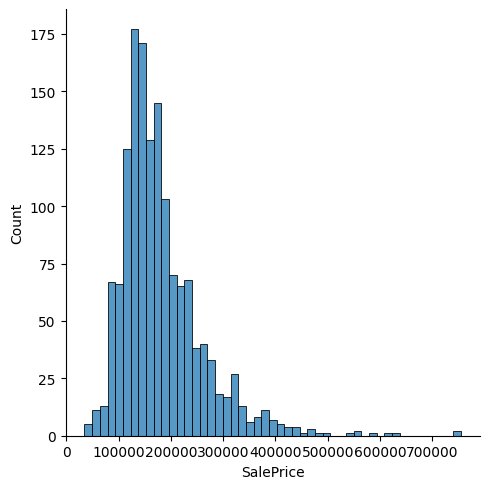

In [7]:
sns.displot(df["SalePrice"])
print(df["SalePrice"].describe())

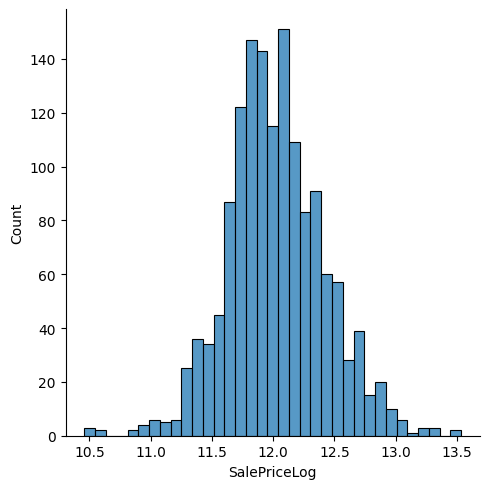

In [8]:
df["SalePriceLog"] = np.log(df["SalePrice"])
sns.displot(df["SalePriceLog"])

### データの前処理

欠損値の除去

In [9]:
for column in df.columns:
    if df[column].dtype == "O":
        df[column] = df[column].fillna("None")
    else:
        df[column] = df[column].fillna(0)


数字を含むが、数字の大小関係が予測に影響を与えない方がよいものを文字列に変換

In [ ]:
num2str_list = ["MSSubClass", "YrSold", "MoSold"] # 住宅の種類、販売年、販売月
for column in num2str_list:
    df[column] = df[column].astype(str)

カテゴリ変数の数値化

In [11]:
df = pd.get_dummies(df)

特徴量エンジニアリング    
予測の精度向上に貢献しそうな新しい変数を追加     
例）建物内の総面積 = １階の面積 + ２階の面積 + 地下の面積

データの分割

In [12]:
from sklearn.model_selection import train_test_split

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
df_x = df.drop(columns=["SalePrice", "SalePriceLog"])
df_y = df["SalePriceLog"]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=test_ratio / (test_ratio + val_ratio)
)

### モデルの作成、学習

機械学習アルゴリズムとしてラッソ回帰を用いる

In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(alpha=0.1)
pipeline = make_pipeline(StandardScaler(), lasso)
pipeline.fit(x_train, y_train)
val_rmse = np.sqrt(mean_squared_error(y_val, pipeline.predict(x_val)))
print(val_rmse)


0.22595185025673042


### モデルの性能評価

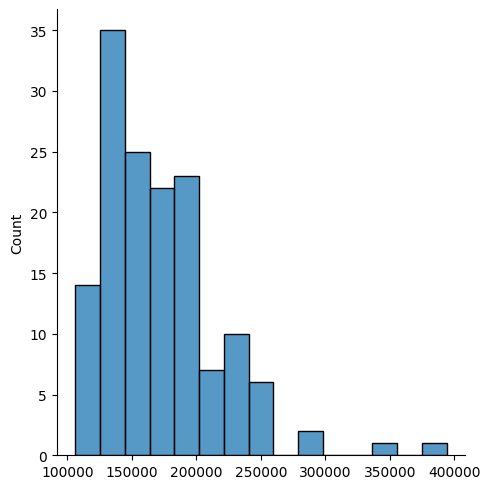

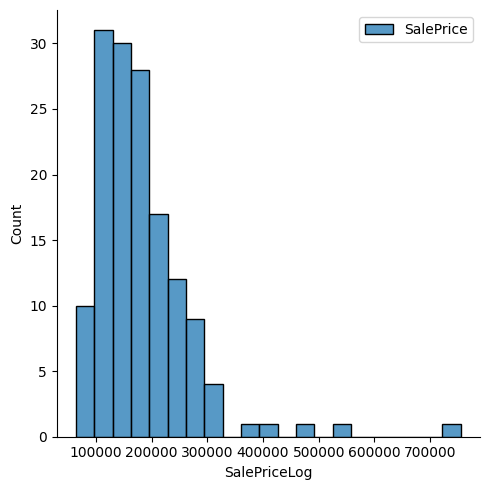

In [14]:
import matplotlib.pyplot as plt

pred = np.exp(pipeline.predict(x_test)) # 予測した値は対数変換後のため、もとに戻す

sns.displot(pred, label="Predicted SalePrice")
sns.displot(np.exp(y_test), label="SalePrice")
plt.legend()